# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/faisalmahmood/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


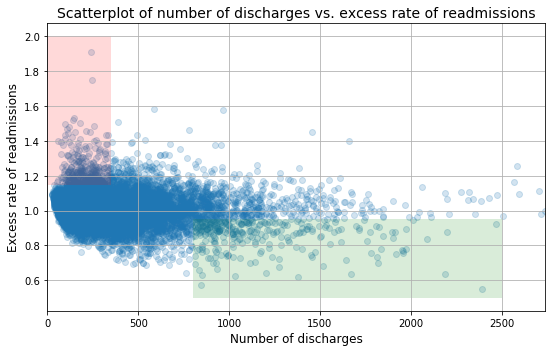

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

In [6]:
hospital_read_df.shape

(16860, 12)

In [7]:
clean_hospital_read_df.shape

(11578, 12)

In [8]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [9]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [10]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [11]:
clean_hospital_read_df_cleaned = clean_hospital_read_df[81:-3]

In [12]:
clean_hospital_read_df_nonzero = clean_hospital_read_df[81:]

# **A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 


**In the above preliminary analysis, the rate of admissions seems to be trending down slightly with increased discharges, based on a glance at the plot. The shaded boxes show that high levels of excess readmissions rates are associated with low numbers of discharges, while the lowest readmissions rates are found among hospitals with higher numbers of discharges. However, more analysis needs to be done to support these initial observations.**

# **B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 


In [13]:
from __future__ import division

In [14]:
under_100 = clean_hospital_read_df_nonzero[clean_hospital_read_df_nonzero['Number of Discharges'] < 100]

print 'Mean excess readmission rate for facilities with under 100 discharges:', under_100['Excess Readmission Ratio'].mean()
print ''
print 'Percentage of facilities with under 100 discharges that have an excess readmission rate greater than 1:', 
print ''
print len(under_100[under_100['Excess Readmission Ratio'] > 1])/(len(under_100))*100, '%'

Mean excess readmission rate for facilities with under 100 discharges: 1.02261835017

Percentage of facilities with under 100 discharges that have an excess readmission rate greater than 1: 
63.2154882155 %


In [15]:
over_1000 = clean_hospital_read_df_nonzero[clean_hospital_read_df_nonzero['Number of Discharges'] > 1000]

print 'Mean excess readmission rate for facilities with over 1000 discharges:', over_1000['Excess Readmission Ratio'].mean()
print ''
print 'Percentage of facilities with over 1000 discharges that have an excess readmission rate greater than 1:', 
print ''
print len(over_1000[over_1000['Excess Readmission Ratio'] > 1])/(len(over_1000))*100, '%'

Mean excess readmission rate for facilities with over 1000 discharges: 0.978335421166

Percentage of facilities with over 1000 discharges that have an excess readmission rate greater than 1: 
44.4924406048 %


**For Part B), the numbers from the report have been confirmed to be correct, based on the above calculations. The calculations were done under the assumption that facilities with zero discharges are not possible, so they have been removed from the data. However, unlike the preliminary analysis, this analysis includes hospitals with over 3000 discharges. **

** Overall, these numbers give some support to the observation that facilities with high number of discharges have lower readmission rates than facilities with fewer discharges. However, additional analysis is still necessary.**

# **C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.


In [16]:
import seaborn as sns

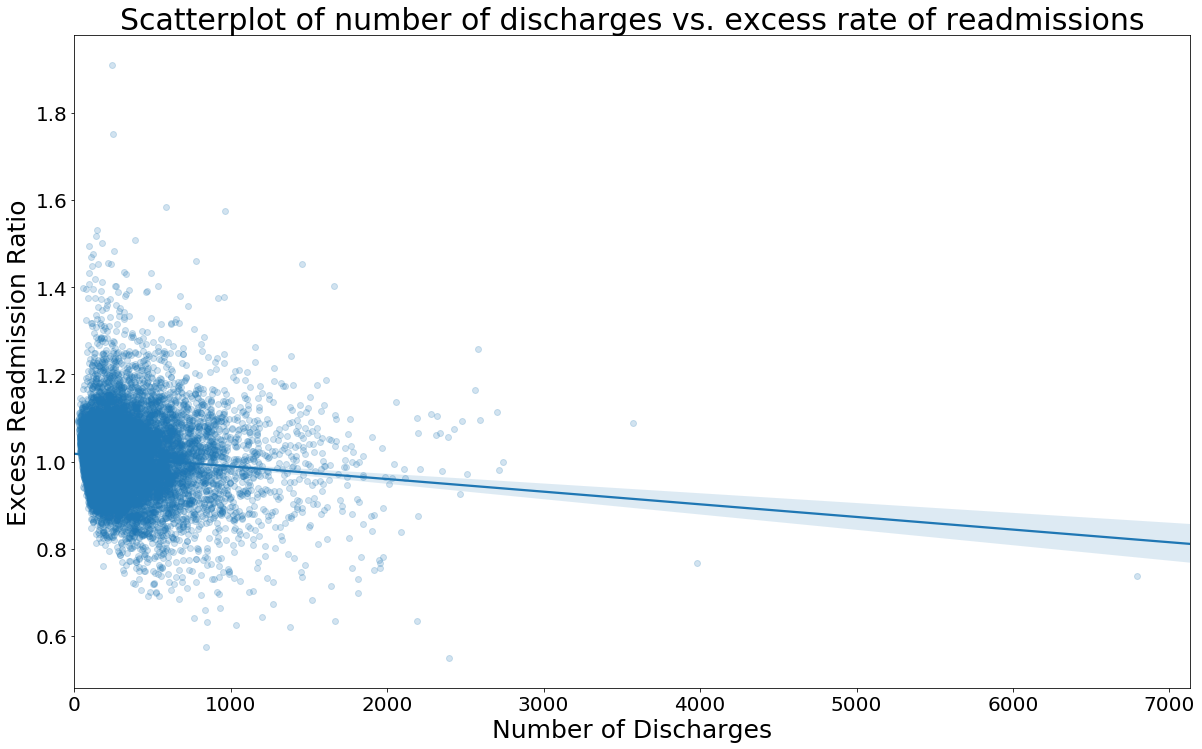

In [17]:
plt.rcParams['figure.figsize'] = [20, 12]

sns.regplot(y = "Excess Readmission Ratio", x = "Number of Discharges", 
            data=clean_hospital_read_df_nonzero, fit_reg = True, scatter_kws={'alpha':0.2})
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=30)
plt.xlabel("Number of Discharges", fontsize = 25)
plt.ylabel("Excess Readmission Ratio", fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(left=0)

plt.show()

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas.core import datetools


/Users/faisalmahmood/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [19]:
m = ols('Q("Excess Readmission Ratio") ~ Q("Number of Discharges")', clean_hospital_read_df_nonzero).fit()
print(m.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Q("Excess Readmission Ratio")   R-squared:                       0.009
Model:                                       OLS   Adj. R-squared:                  0.009
Method:                            Least Squares   F-statistic:                     110.1
Date:                           Wed, 09 Jan 2019   Prob (F-statistic):           1.22e-25
Time:                                   12:17:34   Log-Likelihood:                 11178.
No. Observations:                          11497   AIC:                        -2.235e+04
Df Residuals:                              11495   BIC:                        -2.234e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------

In [20]:
m.pvalues

Intercept                    0.000000e+00
Q("Number of Discharges")    1.222547e-25
dtype: float64

**A scatterplot which included the high-end outliers on the x-axis was created to visualize the entire dataset, and also display the regression model and the trend that it shows.**

**The above ordinary least squares regression test evaluated the readmission rates against the number of discharges. The null hypothesis of this test assumed that a medical facility's number of discharges has no relation to its readmission rate. The alternative hypothesis assumed that such a relationship exists. For this test, the value of $\alpha$ is set to 0.01.**

**The result of this test shows a p-value of 0.000, so the null hypothesis can be rejected. The result supports a statistically significant correlation between hospital capacity and the readmission rates. The slope of the least squares regression line is -2.901 x 10^-5, which means that for every increase of 1000 discharges in a facility, the predicted excess readmission rate declines by 0.029. This result supports all of the initial observations from part A). **

**However, although a statisically significant relationship exists between the hospital capacity and the readmission rates, the hospital capacity (or number of discharges) is not a strong predictor of readmission rates. The correlation (R-squared) is 0.9%, so that suggests that only 0.9% of the variation in readmissions can be explained by variation of the number of discharges. Therefore, although the two variables have a statistically significant correlation, such a correlation is not necessarily practically significant. As a result, further analysis would be necessary before concluding that smaller facilities may lack the resources to ensure quality care and prevent problems that may lead to readmissions. Such an analysis will be done in part D).**

# **D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

**To require medical facilities with under 300 discharges to demonstrate upgraded resource allocation would be a significant regulatory burden. Before deciding to impose such a regulation, an analysis would required to determine whether those smaller facilities have a statistically significant difference in readmission rates compared to larger facilities. A two-sample t-test will be done, with the value of $\alpha$ set to 0.01. Such a test can be done because the sample size is far greater than 30, and each observation can be assumed to be independent. The population standard deviation is unknown, so the z-test cannot be done.**

**Null hypothesis: No statistically significant difference exists between the mean readmission rate of medical facilities with 300 or more discharges, and the mean readmission rate of facilities with under 300 discharges.**

**Alternative hypothesis: Medical facilities with less than 300 discharges have a higher readmission rate than medical facilities with at least 300 discharges.**

In [21]:
from scipy import stats

In [22]:
under300 = clean_hospital_read_df_nonzero[clean_hospital_read_df_nonzero['Number of Discharges'] < 300]
under300 = under300['Excess Readmission Ratio']

In [23]:
plus300 = clean_hospital_read_df_nonzero[clean_hospital_read_df_nonzero['Number of Discharges'] >= 300]
plus300 = plus300['Excess Readmission Ratio']

In [24]:
print 'Mean readmission rates for medical facilities:'
print 'Less than 300 discharges:', under300.mean()
print '300+ discharges:', plus300.mean()

Mean readmission rates for medical facilities:
Less than 300 discharges: 1.01423821218
300+ discharges: 0.999870848024


In [25]:
#Two-sample t-test
stat, p = stats.ttest_ind(under300, plus300)
print 'Two-sample t-test result:' 
print 'Test statistic = %.3f, p-value = %.3f' % (stat, p) 
print ''
alpha = 0.01
if p > alpha:
    print('At α = 0.01, no statistically significant difference between the readmission rates can be found.')
    print('Do not reject the null hypothesis.')
else:
    print('At α = 0.01, a statistically significant difference between the readmission rates appears to exist.')
    print('Reject the null hypothesis.')

Two-sample t-test result:
Test statistic = 8.384, p-value = 0.000

At α = 0.01, a statistically significant difference between the readmission rates appears to exist.
Reject the null hypothesis.


**The p-value of 0.000 was less than $\alpha$, so the null hypothesis can be rejected. The result of the test supports the alternative hypothesis, since the positive test statistic indicates a higher mean for the initial dataset that was entered into the formula (under 300 discharges). As a result, since this analysis supports the alternative hypothesis, the regulation that requires upgraded resource allocation for medical facilities with under 300 discharges may be a good policy. Furthermore, providing incentives to encourage the consolidation of hospitals would help.**

**However, although there is a statistically significant difference in readmission rates, there are other ways to ensure better practical significance. 44% of facilities with over 1000 discharges have an excess readmission ratio above 1.0, so this problem is not limited to small hospitals with limited capacity. Much more work needs to be done to ensure better quality of care for hospitals of all sizes, even though the problem is more significant for the smaller hospitals.**

**The scatterplot in the preliminary report clearly shows areas in which excess readmissions and low readmissions can be found, and color-coding the boxes can help visualize those parts of the plot. Also, removing the high-end outliers enabled a better visualization of the vast majority of data points. However, the problem with a scatterplot is that there are so many points that much of the plot looks like a blob, and the reader cannot tell exactly how many points, or what percentage of the points, are within the high readmission area of the plot. **

**A better way to visualize the data is to plot a hexplot, which visualizes the frequency of observations within each bin. In addition, the plot shows histograms on both the x- and y-axis to visualize the univariate distributions. This type of plot will more clearly show where the higher readmission rates can be found.**

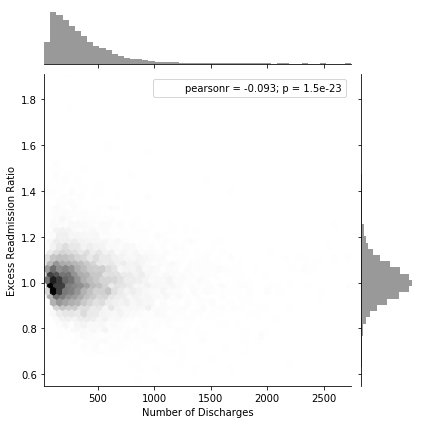

In [26]:
sns.jointplot(x="Number of Discharges", y="Excess Readmission Ratio", 
              data=clean_hospital_read_df_cleaned, kind="hex", color="k")
plt.show()